# 타이타닉호 침몰 사건의 생존자 예측

## 1. 필요한 라이브러리 Import

In [1]:
# 데이터를 다루기 위한 모듈
import numpy as np
import pandas as pd
import random as rnd

# 시각화를 위한 모듈
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning - scikit-learn 머신러닝 모델 Import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

## 2. Dataset 

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

combine = [train_data, test_data]

### 2-1. 데이터 변수 확인

In [3]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### 1. PassengerId : 승객의 고유 번호
#### 2. Survived : 생존 여부(생존=1, 사망=0)
#### 3. Pclass : 객실 등급(1등급, 2등급, 3등급)
#### 4. Name : 승객 이름 => 필요 없는 변수
#### 5. Sex : 승객 성별
#### 6. Age : 나이
#### 7. SibSp : 동반한 형제자매(Sibling)와 배우자(Spouse) 수
#### 8. Parch : 동반한 부모(Parent)와 자식(Child) 수
#### 9. Ticket : 티켓의 고유 넘버 => 필요 없음
#### 10. Fare : 요금
#### 11. Cabin : 객실 번호 => 필요 없음
#### 12. Embarked : 승선한 항
* ##### Q = Queenstown
* ##### S = Southampton
* ##### C = Cherbourg

In [4]:
# 훈련 데이터 보기
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# 훈련 데이터 정보
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 테스트 데이터 보기
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# 테스트 데이터 정보
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 3. 데이터 분석

In [8]:
# 훈련 데이터(숫자 변수) 통계치
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* ### 전체 승객 수는 891명
* ### 생존율은 약 0.384

In [9]:
# 훈련 데이터(object 변수) 통계치
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


* ### 훈련 데이터 남성 수 : 577명
* ### 훈련 데이터에서 가장 많은 승선지 : S(644명)

### 3.1 훈련 데이터에서 객실 등급(Pclass)에 따른 생존율 비교

In [10]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# ascending : 오름차순
# as_index = True로 하면 Pclass를 Index로 사용

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* #### 객실 등급(1등급 > 2등급 > 3등급)이 높을수록 생존율이 높음

### 3.2 훈련 데이터에서 성별(Sex)에 따른 생존율 비교

In [11]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


* #### 여성(0)이 남성보다 생존율이 높음

### 3.3 훈련 데이터에서 함께 승선한 형제자매 수와 배우자 수(SibSp)에 따른 생존율 비교

In [12]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* #### "형제자매 수&배우자 수"와 생존율은 반비례

### 3.4 훈련 데이터에서 함께 승선한 부모와 자식 수(Parch)에 따른 생존율 비교

In [13]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* #### "함께 승선한 부모와 자식 수"와 생존율은 반비례

### 3.5 훈련 데이터에서 생존여부에 따른 나이분포

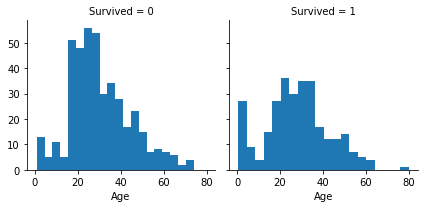

In [14]:
# column을 생존 여부로 나눔
grid = sns.FacetGrid(train_data, col='Survived')

# Histogram으로 시각화. 연령의 분포 확인
grid.map(plt.hist, 'Age', bins=20)

* #### 유아, 20~30대의 생존율이 높음

### 3.6 훈련 데이터에서 객실 등급(Pclass)과 생존 여부에 따른 연령 분포

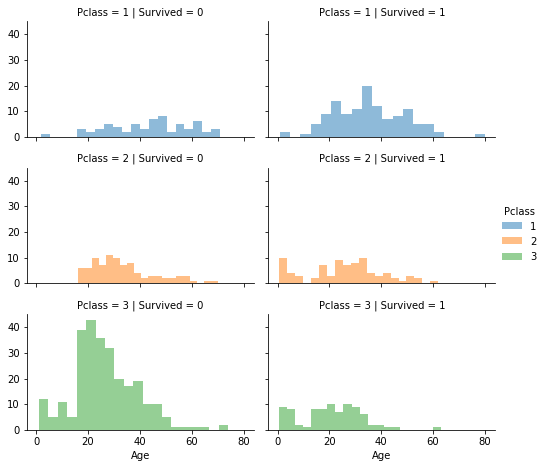

In [15]:
# column을 생존 여부, row와 색깔(hue)을 객실 등급으로 나눔. width = height * aspect
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', hue='Pclass', height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # alpha=투명도

grid.add_legend()

* #### 객실 등급이 3등급인 경우, 승객수는 제일 많지만 생존율은 가장 낮음.
* #### 객실 등급이 2등급인 경우, 유아는 거의 생존함.
* #### 객실 등급이 1등급인 경우, 생존율이 비교적 높음.

### 3.7 훈련 데이터에서 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

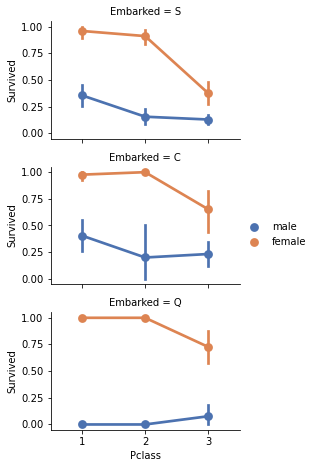

In [16]:
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x:객실 등급, y:생존여부, 색깔:성별, x축 순서:[1, 2, 3], 색깔 순서 : [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['male', 'female'])

grid.add_legend()

### 3.8 훈련 데이터에서 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)

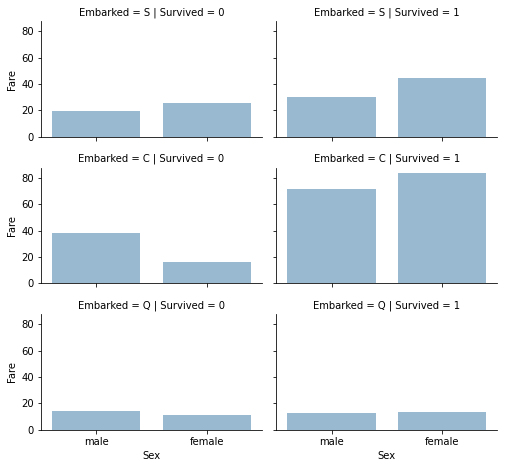

In [17]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)

grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=['male', 'female'])

grid.add_legend()

* #### 승선지가 S, C인 경우, 생존한 승객들의 평균 요금(Fare)이 높음.

## 4. 데이터 전처리

### 4.1 쓸모없는 변수(Ticket, Cabin) 제거

In [18]:
print('Before', train_data.shape, test_data.shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

print('After', train_data.shape, test_data.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


* ### female에서는 Miss와 Mrs가 많고, male에서는 Master와 Mr가 많음.(Mlle와 Ms는 Miss의, Mme는 Mrs의 불어식 표현)
* ### 나머지는 Rare로 분류

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', \
                                                 'Rev', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### 4.2 Title 변수를 숫자변수로 바꿈

In [21]:
title_change = {'Master':1, 'Miss':2, 'Mr':3, 'Mrs':4, 'Rare':5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_change)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,3


### 4.3 안 쓸 변수(Name, PassengerId) 제거

In [22]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]

train_data.shape, test_data.shape

((891, 9), (418, 9))

### 4.3 성별(Sex) 변수를 숫자 변수로 바꿈

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,3
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,3


### 4.4 객실 등급(Pclass)와 성별(Sex) 시각화

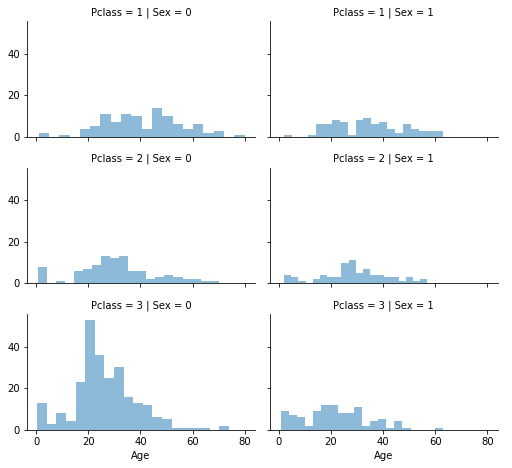

In [24]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### 4.5 Age에서 NAN값을 찾아 바꾸기

In [25]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

* #### Age의 NAN값이 177개인 것을 볼 수 있음.

In [26]:
guess_ages = np.zeros((2, 3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()      
            age_guess = guess_data.median()
            # age의 random값이 소수점을 .5에 가깝도록 변형
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]
    
    dataset['Age'] = dataset['Age'].astype(int)

train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

* #### Age의 NAN값이 채워짐

### 4.6 연령(Age)변수를 범주형으로 바꾸기

In [27]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 10) # 임의로 10개 그룹을 지정
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.439189
5,"(40.0, 48.0]",0.352941
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


### 4.7 AgeBand를 바탕으로 Age를 범주형 변수로 바꿔준 후 AgeBand 제거

In [28]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 8
    dataset.loc[dataset['Age'] > 72, 'Age'] = 9

train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]

train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,3
1,1,1,1,4,1,0,71.2833,C,4
2,1,3,1,3,0,0,7.9250,S,2
3,1,1,1,4,1,0,53.1000,S,4
4,0,3,0,4,0,0,8.0500,S,3
...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13.0000,S,5
887,1,1,1,2,0,0,30.0000,S,2
888,0,3,1,2,1,2,23.4500,S,2
889,1,1,0,3,0,0,30.0000,C,3


### 4.8 SibSp와 Parch를 가족동반여부를 알 수 있는 새로운 변수로 통합 = FamilySize

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


* #### FamilySize=1 인것은 가족과 동반하지 않았음을 의미

In [30]:
for dataset in combine:
    dataset['notAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'notAlone'] = 1
    
train_data[['notAlone', 'Survived']].groupby(['notAlone'], as_index=False).mean()

,notAlone,Survived
0,0,0.505650
1,1,0.303538


* #### 1은 동반한 사람이 없다는 것을 의미
* #### 0은 동반했다는 새로운 변수 'notAlone'을 생성

In [31]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]

train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,notAlone
0,0,3,0,2,7.2500,S,3,0
1,1,1,1,4,71.2833,C,4,0
2,1,3,1,3,7.9250,S,2,1
3,1,1,1,4,53.1000,S,4,0
4,0,3,0,4,8.0500,S,3,1
...,...,...,...,...,...,...,...,...
886,0,2,0,3,13.0000,S,5,1
887,1,1,1,2,30.0000,S,2,1
888,0,3,1,2,23.4500,S,2,0
889,1,1,0,3,30.0000,C,3,1


### 4.9 승선지(Embarked)변수를 최빈값으로 대체

In [32]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### 4.10 승선지(Embarked)변수를 범주형 변수로 바꿈

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,notAlone
0,0,3,0,2,7.2500,0,3,0
1,1,1,1,4,71.2833,1,4,0
2,1,3,1,3,7.9250,0,2,1
3,1,1,1,4,53.1000,0,4,0
4,0,3,0,4,8.0500,0,3,1
...,...,...,...,...,...,...,...,...
886,0,2,0,3,13.0000,0,5,1
887,1,1,1,2,30.0000,0,2,1
888,0,3,1,2,23.4500,0,2,0
889,1,1,0,3,30.0000,1,3,1


### 4.11 요금(Fare)변수를 중앙값으로 대체

In [35]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,notAlone
0,892,3,0,4,7.8292,2,3.0,1
1,893,3,1,5,7.0000,0,4.0,0
2,894,2,0,7,9.6875,2,3.0,1
3,895,3,0,3,8.6625,0,3.0,1
4,896,3,1,2,12.2875,0,4.0,0


### 4.12 요금(Fare)을 범주형으로 바꿈

In [36]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 10)# qcut => 동일한 빈도수를 기준으로 나눔. cut => 동일한 개수로 나눔
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27.0]",0.516854
7,"(27.0, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


In [37]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.55, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 8.05), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 10.5), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 14.454), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 21.679), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 27.0), 'Fare'] = 6
    dataset.loc[(dataset['Fare'] > 27.0) & (dataset['Fare'] <= 39.688), 'Fare'] = 7
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 77.958), 'Fare'] = 8
    dataset.loc[dataset['Fare'] > 77.958, 'Fare'] = 9

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]

train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,notAlone
0,0,3,0,2,0.0,0,3,0
1,1,1,1,4,8.0,1,4,0
2,1,3,1,3,2.0,0,2,1
3,1,1,1,4,8.0,0,4,0
4,0,3,0,4,2.0,0,3,1
...,...,...,...,...,...,...,...,...
886,0,2,0,3,4.0,0,5,1
887,1,1,1,2,7.0,0,2,1
888,0,3,1,2,6.0,0,2,0
889,1,1,0,3,7.0,1,3,1


In [38]:
test_data

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,notAlone
0,892,3,0,4,1.0,2,3.0,1
1,893,3,1,5,0.0,0,4.0,0
2,894,2,0,7,3.0,2,3.0,1
3,895,3,0,3,3.0,0,3.0,1
4,896,3,1,2,4.0,0,4.0,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,2,2.0,0,3.0,1
414,1306,1,1,4,9.0,1,0.0,1
415,1307,3,0,4,0.0,0,3.0,1
416,1308,3,0,2,2.0,0,3.0,1


## 5. 데이터 준비

In [39]:
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']

X_test = test_data.drop('PassengerId', axis=1)

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

## 6. ML Model에 훈련

### 6.1 Logistic Regression - 로지스틱 회귀

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.57

In [41]:
coeff_data = pd.DataFrame(train_data.columns.delete(0))
coeff_data.columns = ['Feature']
coeff_data["Correlation"] = pd.Series(logreg.coef_[0])

coeff_data.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.449064
4,Embarked,0.270689
3,Fare,-0.023208
6,notAlone,-0.062464
5,Title,-0.131392
2,Age,-0.243616
0,Pclass,-1.251672


* #### Survived와 관련(Correlation)이 높은것은 성별(Sex)이다.

### 6.2 SVC - Support Vector Machine

In [42]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


81.59

### 6.3 K-NN - K Nearest Neighborhood

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.2

### 6.4 Gaussian Naive Bayes

In [44]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.77

### 6.5 Perceptron

In [45]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

72.84

### 6.6 Linear SVC

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

79.24


### 6.7 SGD - Stochastic Gradient Descent

In [47]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

63.52

### 6.8 Decision Tree

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.68

### 6.9 Random Forest

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.68

## 7. 모델 별 Score 모음

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.68
8,Decision Tree,90.68
1,KNN,86.20
0,Support Vector Machines,81.59
2,Logistic Regression,79.57
7,Linear SVC,79.24
4,Naive Bayes,76.77
5,Perceptron,72.84
6,Stochastic Gradient Decent,63.52


In [51]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

In [52]:
df1 = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df1.to_csv('gender_submission.csv',index = False)